In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import pathlib as pl
import os
import copy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

### Reading the Data
Source of csv file: https://thinkingneuron.com/concrete-strength-prediction-case-study-in-python/

In [3]:
#cement_df=pd.read_csv('C:/Users/santa/Documents/AI/ConcreteStrengthData.csv')

path_csv = pl.Path(os.getcwd()) / f'ConcreteStrengthData.csv'
with open(path_csv, 'rb') as file:
    cement_df = pd.read_csv(file)
    
# Removing duplicate rows if any
cement_df=cement_df.drop_duplicates()
cement_df_Numeric=pd.get_dummies(cement_df)

In [4]:
cement_df_Numeric.columns=["CementComponent","BlastFurnaceSlag","FlyAshComponent","WaterComponent",
                "SuperplasticizerComponent","CoarseAggregateComponent","FineAggregateComponent","AgeInDays","Strength"]
cement_df_Numeric.shape

(1005, 9)

### Splitting data into Train and Test

In [5]:
cement_df_f=cement_df_Numeric.copy()

cement_X=cement_df_f.iloc[:,:-1]
cement_Y=cement_df_f.iloc[:,-1]

cement_train_X,cement_test_X,cement_train_Y,cement_test_Y= train_test_split(cement_X,cement_Y,test_size=0.20,random_state=48)

### Root Mean Sqaure Error Function

In [6]:
#Root Mean Square Error (RMSE)
def rmse(prediction, true):
    return np.sqrt(np.mean(np.square(prediction-true)))

### Different Regression models are tested on the Training and Test data and during the process key hyperparameters were tested too.
- Linear Regression (LREG)
- Kernel Ridge Regression (KRR), Hyperparameter: Alpha[0.001,0.01,0.1,0.2,0.5]
- Regression Decision Tree (DT), Hyperparameter: Max_Depth=[1,5,10,20,50,100]
- Random Forest Regression (RF), Hyperparameter: Max_Depth=[1,5,10,20,50,100] 
- MLPRegressor, Hyperparameter: activation_f_l=["logistic","tanh","relu", lr_start_l=[0.1,0.05,0.02,0.01], hidden_layer_l=[(50,30,20),(40,20,10),(30,15,5),(20,10,3)]

### Linear Regrerssion

In [7]:
def fit_and_predict_LREG(Xin, Yin, X_val):
    RegModel = LinearRegression()
    RegModel.fit(Xin, Yin)
    return RegModel.predict(X_val)

In [8]:
#rmse_train=rmse(fit_and_predict_LREG(cement_train_X, cement_train_Y, cement_train_X),cement_train_Y)
#rmse_test=rmse(fit_and_predict_LREG(cement_train_X, cement_train_Y, cement_test_X),cement_test_Y)
#print('RMSE for Linear Regression on Training Data:','%.4f'%rmse_train)
#print('RMSE for Linear Regression on Test Data:','%.4f'%rmse_test)
#print()
r2_train=fit_and_predict_LREG(cement_train_X, cement_train_Y, cement_train_X)
r2_test=fit_and_predict_LREG(cement_train_X, cement_train_Y, cement_test_X)
print('R2 Value for Linear Regression on Training Data:','%.4f'%metrics.r2_score(cement_train_Y, r2_train))
print('R2 Value for Linear Regression on Test Data::','%.4f'%metrics.r2_score(cement_test_Y, r2_test))

R2 Value for Linear Regression on Training Data: 0.5995
R2 Value for Linear Regression on Test Data:: 0.6144


### Kernel Ridge Regrerssion

In [9]:
def fit_and_predict_KRR(Xin, Yin, X_val,a):
    """fit a Kernel Ridge Regression Model on the training data and predict the y values of the validation X data.
    :param train: the training data
    :param validate: the validation data 
    :return: predictions at the validation X points Mx1 numpy array"""
    #KRR = KernelRidge(alpha=0.1, kernel='rbf', gamma=0.2,  degree=100)
    KRR = KernelRidge(alpha=a, kernel='rbf', gamma=0.2,  degree=10)
    KRR.fit(Xin, Yin)
    return KRR.predict(X_val)

In [10]:
alph=[0.001,0.01,0.1,0.2,0.5]
for i in range(0,len(alph)):
    #rmse_train=rmse(fit_and_predict_KRR(cement_train_X, cement_train_Y, cement_train_X,alph[i]),cement_train_Y)
    #rmse_test=rmse(fit_and_predict_KRR(cement_train_X, cement_train_Y, cement_test_X,alph[i]),cement_test_Y)
    #print('RMSE for KRR Regression on Training Data-alpha=',alph[i],':','%.4f'%rmse_train)
    #print('RMSE for KRR Regression on Test Data-alpha=',alph[i],':','%.4f'%rmse_test)
    #print()
    r2_train=fit_and_predict_KRR(cement_train_X, cement_train_Y, cement_train_X,alph[i])
    r2_test=fit_and_predict_KRR(cement_train_X, cement_train_Y, cement_test_X,alph[i])
    print('R2 Value for KRR Regression on Training Data-alpha=',alph[i],':','%.4f'%metrics.r2_score(cement_train_Y, r2_train))
    print('R2 Value for KRR Regression on Test Data-alpha=',alph[i],':','%.4f'%metrics.r2_score(cement_test_Y, r2_test))
    print()

R2 Value for KRR Regression on Training Data-alpha= 0.001 : 0.9964
R2 Value for KRR Regression on Test Data-alpha= 0.001 : -3.3352

R2 Value for KRR Regression on Training Data-alpha= 0.01 : 0.9959
R2 Value for KRR Regression on Test Data-alpha= 0.01 : -3.3377

R2 Value for KRR Regression on Training Data-alpha= 0.1 : 0.9560
R2 Value for KRR Regression on Test Data-alpha= 0.1 : -3.3669

R2 Value for KRR Regression on Training Data-alpha= 0.2 : 0.8608
R2 Value for KRR Regression on Test Data-alpha= 0.2 : -3.4043

R2 Value for KRR Regression on Training Data-alpha= 0.5 : 0.4468
R2 Value for KRR Regression on Test Data-alpha= 0.5 : -3.5217



- Kernel Ridge Regression (KRR), Hyperparameter: Alpha is chosen as 0.1, Lower values tend to fit better, for values of Alpha higher than 0.1 the fit is poor.

### Regression Decision Tree

In [11]:
def fit_and_predict_DT(Xin, Yin, X_val,md):
    """fit a Regression Decision Tree on the training data and predict the y values of the validation X data.
    :param train: the training data
    :param validate: the validation data 
    :return: predictions at the validation X points Mx1 numpy array"""
    
    #DTree = DecisionTreeRegressor(max_depth=10)
    DTree = DecisionTreeRegressor(max_depth=md)
    DTree.fit(Xin, Yin)
    return DTree.predict(X_val)

In [12]:
mxdep=[1,5,10,20,50,100]
for i in range(0,len(mxdep)):
#    rmse_train=rmse(fit_and_predict_DT(cement_train_X, cement_train_Y, cement_train_X),cement_train_Y,maxdep)
#    rmse_test=rmse(fit_and_predict_DT(cement_train_X, cement_train_Y, cement_test_X),cement_test_Y,maxdep)
#    print('RMSE for DTree Regression on Training Data:','%.4f'%rmse_train)
#    print('RMSE for DTree Regression on Test Data:','%.4f'%rmse_test)
#    print()
    r2_train=fit_and_predict_DT(cement_train_X, cement_train_Y, cement_train_X,mxdep[i])
    r2_test=fit_and_predict_DT(cement_train_X, cement_train_Y, cement_test_X,mxdep[i])
    print('R2 Value for DTree Regression on Training Data-dep=',mxdep[i],':',
          '%.4f'%metrics.r2_score(cement_train_Y, r2_train))
    print('R2 Value for DTree Regression on Test Data-dep=',mxdep[i],':',
          '%.4f'%metrics.r2_score(cement_test_Y, r2_test))
    print()

R2 Value for DTree Regression on Training Data-dep= 1 : 0.2606
R2 Value for DTree Regression on Test Data-dep= 1 : 0.2456

R2 Value for DTree Regression on Training Data-dep= 5 : 0.7932
R2 Value for DTree Regression on Test Data-dep= 5 : 0.7085

R2 Value for DTree Regression on Training Data-dep= 10 : 0.9761
R2 Value for DTree Regression on Test Data-dep= 10 : 0.8641

R2 Value for DTree Regression on Training Data-dep= 20 : 0.9965
R2 Value for DTree Regression on Test Data-dep= 20 : 0.8734

R2 Value for DTree Regression on Training Data-dep= 50 : 0.9965
R2 Value for DTree Regression on Test Data-dep= 50 : 0.8394

R2 Value for DTree Regression on Training Data-dep= 100 : 0.9965
R2 Value for DTree Regression on Test Data-dep= 100 : 0.8721



- Regression Decision Tree (DT), Hyperparameter: Max_Depth is chosen as 10. A good R2 value is acheived by the depth value of 10 and after that the improvement is marginal. Increasing depth will fit better but not necesarily a better solution.

### Random Forest Regression

In [13]:
def fit_and_predict_RF(Xin, Yin, X_val,md):
    """fit a Random Forest Regression Tree on the training data and predict the y values of the validation X data.
    :param train: the training data
    :param validate: the validation data 
    :return: predictions at the validation X points Mx1 numpy array"""
    
    RandForest = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='squared_error')
    RandForest.fit(Xin, Yin)
    return RandForest.predict(X_val)

In [14]:
mxdep=[1,5,10,20,50,100]
for i in range(0,len(mxdep)):
#    rmse_train=rmse(fit_and_predict_RF(cement_train_X, cement_train_Y, cement_train_X),cement_train_Y,maxdep[i])
#    rmse_test=rmse(fit_and_predict_RF(cement_train_X, cement_train_Y, cement_test_X),cement_test_Y,maxdep[i])
#    print('RMSE for RandForest Regression on Training Data:','%.4f'%rmse_train)
#    print('RMSE for RandForest Regression on Test Data:','%.4f'%rmse_test)
#    print()
    r2_train=fit_and_predict_RF(cement_train_X, cement_train_Y, cement_train_X,mxdep[i])
    r2_test=fit_and_predict_RF(cement_train_X, cement_train_Y, cement_test_X,mxdep[i])
    print('R2 Value for RandForest Regression on Training Data-dep=',mxdep[i],':',
          '%.4f'%metrics.r2_score(cement_train_Y, r2_train))
    print('R2 Value for RandForest Regression on Test Data-dep=',mxdep[i],':',
          '%.4f'%metrics.r2_score(cement_test_Y, r2_test))
    print()

R2 Value for RandForest Regression on Training Data-dep= 1 : 0.8677
R2 Value for RandForest Regression on Test Data-dep= 1 : 0.8446

R2 Value for RandForest Regression on Training Data-dep= 5 : 0.8733
R2 Value for RandForest Regression on Test Data-dep= 5 : 0.8438

R2 Value for RandForest Regression on Training Data-dep= 10 : 0.8677
R2 Value for RandForest Regression on Test Data-dep= 10 : 0.8479

R2 Value for RandForest Regression on Training Data-dep= 20 : 0.8731
R2 Value for RandForest Regression on Test Data-dep= 20 : 0.8447

R2 Value for RandForest Regression on Training Data-dep= 50 : 0.8713
R2 Value for RandForest Regression on Test Data-dep= 50 : 0.8390

R2 Value for RandForest Regression on Training Data-dep= 100 : 0.8691
R2 Value for RandForest Regression on Test Data-dep= 100 : 0.8486



- Random Forest Regression (RF), Hyperparameter: Max_Depth is chosen as 10. A good R2 value is acheived by the depth value of 10 and after that the improvement is marginal. Increasing depth will fit better but not necesarily a better solution.

### MLP Regression

In [15]:
def mlp_regr_cv(hidden_layer,activation_function,lr_start):
    mlp_regr_grid={"hidden_layer_sizes":hidden_layer,"activation":activation_function,"learning_rate_init":lr_start}
    mlp_regr = MLPRegressor(random_state=48,solver='adam',early_stopping=True,max_iter=1000)
    mlp_reg_cv = GridSearchCV(mlp_regr, mlp_regr_grid,scoring='neg_root_mean_squared_error',cv=5)
    return mlp_reg_cv

In [16]:
activation_f_l=["logistic","tanh","relu"]
lr_start_l=[0.1,0.05,0.02,0.01]
hidden_layer_l=[(50,30,20),(40,20,10),(30,15,5),(20,10,3)]
mlp_reg_cv_search=mlp_regr_cv(hidden_layer=hidden_layer_l,activation_function=activation_f_l,lr_start=lr_start_l)

In [17]:
mlp_reg_cv_search.fit(cement_train_X,cement_train_Y)
print("Best parameters set:",mlp_reg_cv_search.best_params_)
print("Best score:",mlp_reg_cv_search.best_score_)

Best parameters set: {'activation': 'relu', 'hidden_layer_sizes': (40, 20, 10), 'learning_rate_init': 0.02}
Best score: -7.095896639691401


- MLPRegressor, Hyperparameter: {'activation': 'relu', 'hidden_layer_sizes': (40, 20, 10), 'learning_rate_init': 0.02}

### Below is a Comparison of the Mean Squared Error and R2 values from different Regression methods having optimal value of hyperparameters. The MSE & R2 values are calculated for both Training and Test Data.

### Linear Regrerssion

In [18]:
rmse_train=rmse(fit_and_predict_LREG(cement_train_X, cement_train_Y, cement_train_X),cement_train_Y)
rmse_test=rmse(fit_and_predict_LREG(cement_train_X, cement_train_Y, cement_test_X),cement_test_Y)
print('RMSE for Linear Regression on Training Data:','%.4f'%rmse_train)
print('RMSE for Linear Regression on Test Data:','%.4f'%rmse_test)
print()
r2_train=fit_and_predict_LREG(cement_train_X, cement_train_Y, cement_train_X)
r2_test=fit_and_predict_LREG(cement_train_X, cement_train_Y, cement_test_X)
print('R2 Value for Linear Regression on Training Data:','%.4f'%metrics.r2_score(cement_train_Y, r2_train))
print('R2 Value for Linear Regression on Test Data::','%.4f'%metrics.r2_score(cement_test_Y, r2_test))

RMSE for Linear Regression on Training Data: 10.3259
RMSE for Linear Regression on Test Data: 9.9773

R2 Value for Linear Regression on Training Data: 0.5995
R2 Value for Linear Regression on Test Data:: 0.6144


### Kernel Ridge Regrerssion

In [19]:
alph=0.1
rmse_train=rmse(fit_and_predict_KRR(cement_train_X, cement_train_Y, cement_train_X,alph),cement_train_Y)
rmse_test=rmse(fit_and_predict_KRR(cement_train_X, cement_train_Y, cement_test_X,alph),cement_test_Y)
print('RMSE for KRR Regression on Training Data:','%.4f'%rmse_train)
print('RMSE for KRR Regression on Test Data:','%.4f'%rmse_test)
print()
r2_train=fit_and_predict_KRR(cement_train_X, cement_train_Y, cement_train_X,alph)
r2_test=fit_and_predict_KRR(cement_train_X, cement_train_Y, cement_test_X,alph)
print('R2 Value for KRR Regression on Training Data:','%.4f'%metrics.r2_score(cement_train_Y, r2_train))
print('R2 Value for KRR Regression on Test Data:','%.4f'%metrics.r2_score(cement_test_Y, r2_test))
print()

RMSE for KRR Regression on Training Data: 3.4215
RMSE for KRR Regression on Test Data: 33.5772

R2 Value for KRR Regression on Training Data: 0.9560
R2 Value for KRR Regression on Test Data: -3.3669



### Regression Decision Tree

In [20]:
maxdep=10
rmse_train=rmse(fit_and_predict_DT(cement_train_X, cement_train_Y, cement_train_X,maxdep),cement_train_Y)
rmse_test=rmse(fit_and_predict_DT(cement_train_X, cement_train_Y, cement_test_X,maxdep),cement_test_Y)
print('RMSE for DTree Regression on Training Data:','%.4f'%rmse_train)
print('RMSE for DTree Regression on Test Data:','%.4f'%rmse_test)
print()
r2_train=fit_and_predict_DT(cement_train_X, cement_train_Y, cement_train_X,maxdep)
r2_test=fit_and_predict_DT(cement_train_X, cement_train_Y, cement_test_X,maxdep)
print('R2 Value for DTree Regression on Training Data:','%.4f'%metrics.r2_score(cement_train_Y, r2_train))
print('R2 Value for DTree Regression on Test Data:','%.4f'%metrics.r2_score(cement_test_Y, r2_test))
print()

RMSE for DTree Regression on Training Data: 2.5223
RMSE for DTree Regression on Test Data: 5.8202

R2 Value for DTree Regression on Training Data: 0.9761
R2 Value for DTree Regression on Test Data: 0.8339



### Random Forest Regression

In [21]:
maxdep=10
rmse_train=rmse(fit_and_predict_RF(cement_train_X, cement_train_Y, cement_train_X,maxdep),cement_train_Y)
rmse_test=rmse(fit_and_predict_RF(cement_train_X, cement_train_Y, cement_test_X,maxdep),cement_test_Y)
print('RMSE for RandForest Regression on Training Data:','%.4f'%rmse_train)
print('RMSE for RandForest Regression on Test Data:','%.4f'%rmse_test)
print()
r2_train=fit_and_predict_RF(cement_train_X, cement_train_Y, cement_train_X,maxdep)
r2_test=fit_and_predict_RF(cement_train_X, cement_train_Y, cement_test_X,maxdep)
print('R2 Value for RandForest Regression on Training Data:','%.4f'%metrics.r2_score(cement_train_Y, r2_train))
print('R2 Value for RandForest Regression on Test Data:','%.4f'%metrics.r2_score(cement_test_Y, r2_test))
print()

RMSE for RandForest Regression on Training Data: 5.9334
RMSE for RandForest Regression on Test Data: 6.3389

R2 Value for RandForest Regression on Training Data: 0.8665
R2 Value for RandForest Regression on Test Data: 0.8413



### MLP Regression

In [23]:
mlp_reg_best=MLPRegressor(random_state=48,solver='adam',early_stopping=True,max_iter=2000, activation="relu",
                         hidden_layer_sizes=(40, 20, 10),learning_rate_init=0.02)
mlp_reg_best.fit(cement_train_X,cement_train_Y)
pred_train_Y=mlp_reg_best.predict(cement_train_X)
pred_test_Y=mlp_reg_best.predict(cement_test_X)
print("RMSE for MLP Regression on Training Data:",'%.4f'%MSE(pred_train_Y,cement_train_Y,squared=False))
print("RMSE for MLP Regression on Test Data:",'%.4f'%MSE(pred_test_Y,cement_test_Y,squared=False))
print()
print("R2 for MLP Regression on Training Data:",'%.4f'%r2_score(pred_train_Y,cement_train_Y))
print("R2 for MLP Regression on Test Data:",'%.4f'%r2_score(pred_test_Y,cement_test_Y))
print()

RMSE for MLP Regression on Training Data: 7.0885
RMSE for MLP Regression on Test Data: 6.4368

R2 for MLP Regression on Training Data: 0.7572
R2 for MLP Regression on Test Data: 0.8104



### Based on Anlysis Random Forest Regression and MLP Regression were taken to the next stage of analysis.
- K fold analysis for Random Forest Regression
- Loss curve Analysis 

### Running k-Fold Cross validation on a Random Forest Regressor

In [24]:
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
RandForest = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='squared_error')

Accuracy_Values=cross_val_score(RandForest, cement_X , cement_Y, cv=10)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.29178384 0.63435156 0.73837838 0.57717288 0.48777425 0.51895852
 0.79628628 0.7056161  0.62354182 0.65842468]

Final Average Accuracy of the model: 0.6


Text(0.5, 0, 'k')

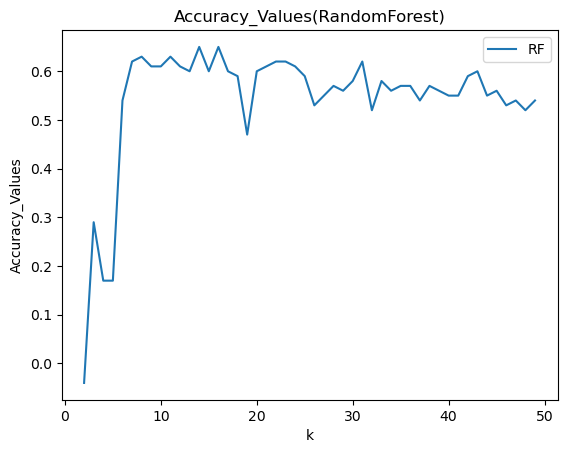

In [109]:
K=50
RF_folds = []
for i in range(2, K):
    Accuracy_Values=cross_val_score(RandForest, cement_X , cement_Y, cv=i)
    RF_folds.append(round(Accuracy_Values.mean(),2))

plt.plot(list(range(2,K)), RF_folds, label='RF')
plt.legend()
plt.title('Accuracy_Values(RandomForest)')
plt.ylabel('Accuracy_Values')
plt.xlabel('k')



### Random Forest
- The results are consistent after k=10 and the average accuracy of the model is around 0.6

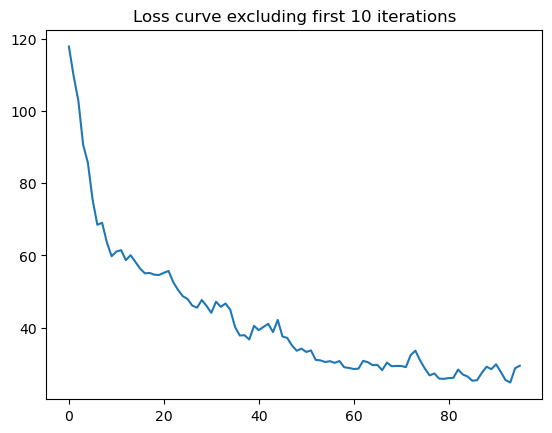

In [25]:
mlp_reg_best=MLPRegressor(random_state=48,solver='adam',early_stopping=True,max_iter=2000, activation="relu",
                         hidden_layer_sizes=(40, 20, 10),learning_rate_init=0.02)
mlp_reg_best.fit(cement_train_X,cement_train_Y)
pred_train_Y=mlp_reg_best.predict(cement_train_X)
pred_test_Y=mlp_reg_best.predict(cement_test_X)

plt.plot(np.array(mlp_reg_best.loss_curve_[10:]))
plt.title("Loss curve excluding first 10 iterations")
plt.show()

### MLP Regressor
- The loss function curve looks good charcteristic of text book example, suggesting that MLP is doing a good job

In [26]:
def predictVSactual(actual_y,y_predict,title_label):
    fig,ax=plt.subplots(1,len(actual_y),figsize=(15,15))
    for i,col in enumerate(actual_y,0):
        ax[i].plot(np.ravel(actual_y[i]),
                   np.ravel(y_predict[i]),'o',markeredgecolor="black")
        ax[i].set_title(title_label[i])
        ax[i].set_xlabel('Actual Values')
        ax[i].set_ylabel('Predicted Values')
        ax[i].set(aspect='equal')
        x=ax[i].get_xlim()
        y=ax[i].get_xlim()
        ax[i].plot(x,y, ls="--", c=".3")
    return fig,ax

In [27]:
RandForest.fit(cement_train_X, cement_train_Y)
actual_y_cement=[cement_train_Y,cement_train_Y]
pred_y_cement=[pred_train_Y,RandForest.predict(cement_train_X)]

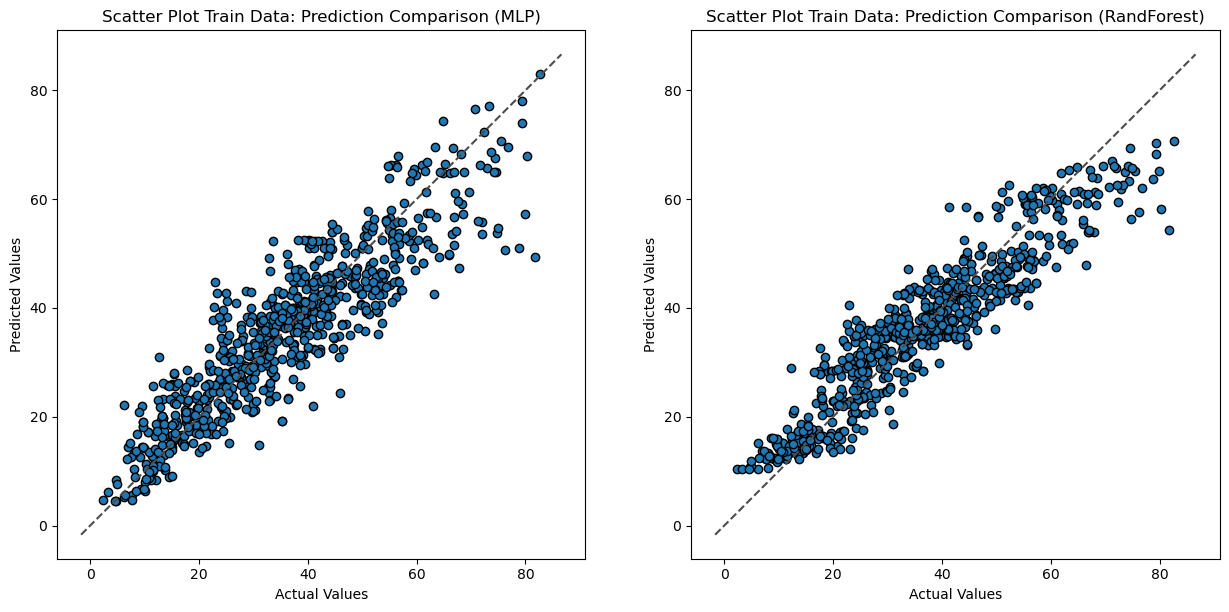

In [28]:
predictVSactual(actual_y_cement,pred_y_cement,
                ["Scatter Plot Train Data: Prediction Comparison (MLP)","Scatter Plot Train Data: Prediction Comparison (RandForest)"])
plt.show()

In [29]:
actual_y_cement=[cement_test_Y,cement_test_Y]
pred_y_cement=[pred_test_Y,RandForest.predict(cement_test_X)]

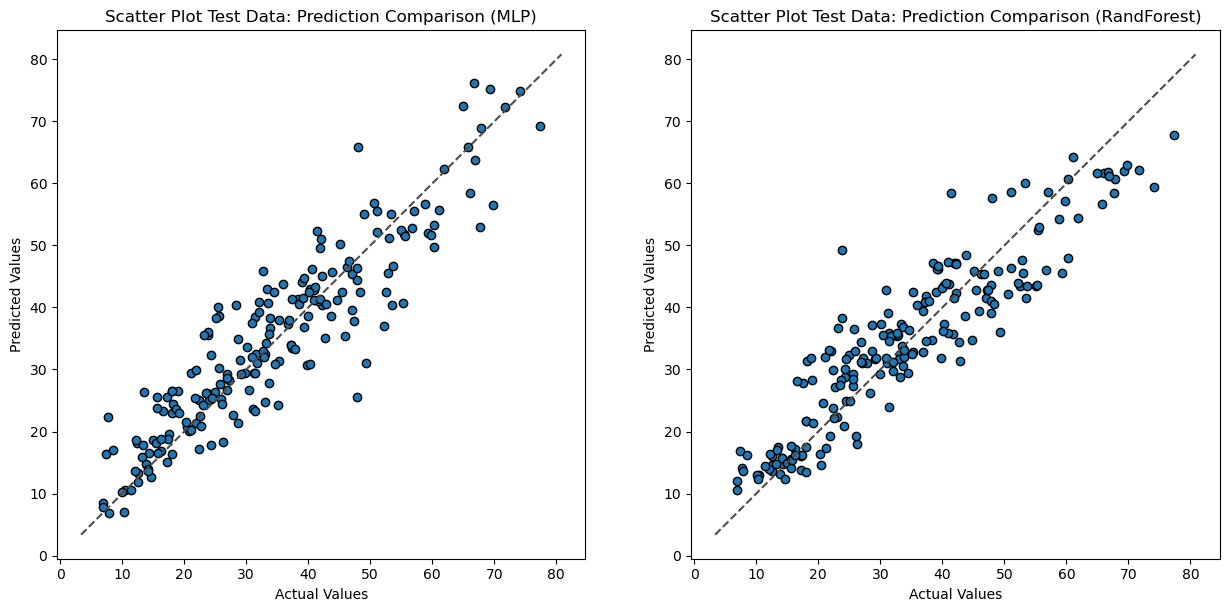

In [30]:
predictVSactual(actual_y_cement,pred_y_cement,
                ["Scatter Plot Test Data: Prediction Comparison (MLP)","Scatter Plot Test Data: Prediction Comparison (RandForest)"])
plt.show()

### Crossplot analysis (Predicted Vs Actual), MLP & Random Forest Approach for both Train and Test Data
- Plot of results from MLP is on the left and it can be observed that the data scatter around the dashed line (fit) is reasonable.
- Plot of results from Random Forest is on the right and it can be observed that the data scatter around the dashed line (fit) in the central bit is good but for actual values <10Mpa and >60 Mpa the scatter deviates from the fitted dashed line suggesting over and under prediction respectively.s reasonable.

In [31]:
def residual_plot(actual_y,predict_y,title_label):
    fig,ax=plt.subplots(1,len(actual_y),figsize=(10,5))
    for i,col in enumerate(actual_y,0):
        sns.residplot(x=actual_y[i], y=predict_y[i], lowess=True, color="g",ax=ax[i])
        ax[i].set_title(title_label[i])
    return fig,ax

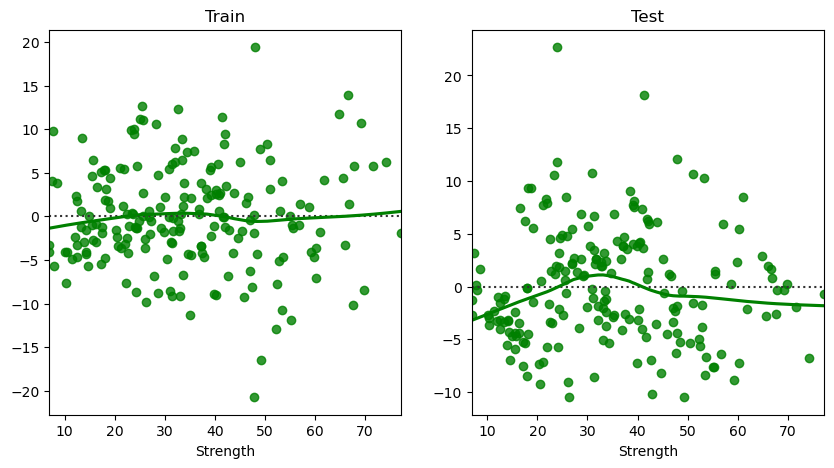

In [32]:
residual_plot(actual_y_cement,pred_y_cement,["Train","Test"])
plt.show()

In [33]:
raw_pred_err_list=[]

for i in range(0,len(actual_y_cement)):
    list_temp=[]
    list_temp=pred_y_cement[i]-actual_y_cement[i].to_numpy().ravel()
    raw_pred_err_list.append(list_temp)
raw_pred_err_label=["Raw Prediction Errors (Train)","Raw Prediction Errors (Test)"]

In [34]:
def raw_predict_err_hist(err_predict_list,bin_no,title_label):
    fig,ax=plt.subplots(1,len(err_predict_list),figsize=(10,5))
    for i,col in enumerate(err_predict_list,0):
        sns.histplot(x=err_predict_list[i],bins=bin_no,kde=True,ax=ax[i])
        ax[i].set_title(title_label[i])
    return fig,ax

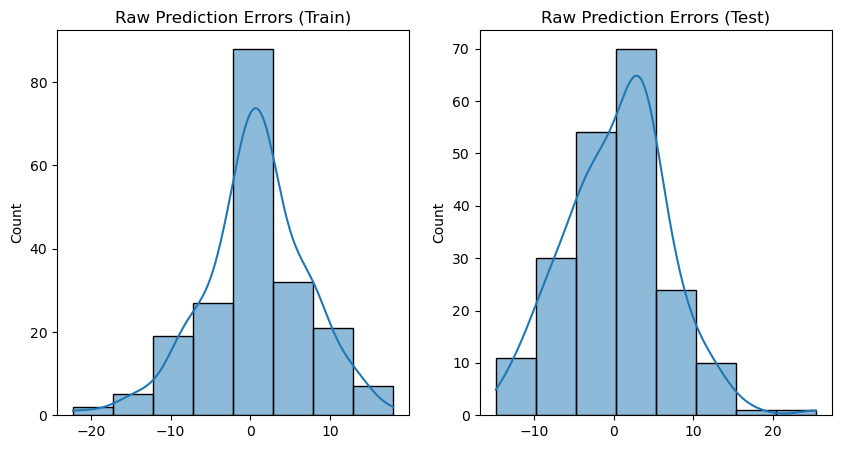

In [35]:
raw_predict_err_hist(raw_pred_err_list,bin_no=8,title_label=raw_pred_err_label)
plt.show()

### Prediction Erro Analysis
- This suggests that most of the erros within +/- 5 Mpa and Majority errors are within +/- 20 Mpa.

## Conclusion:
- Based on Analysis a decision has been made to proceed with MLP Regressor

In [36]:
def FunctionPredictResult(InputData):
    cement_df=pd.read_csv('C:/Users/santa/Documents/AI/ConcreteStrengthData.csv')
    # Removing duplicate rows if any
    cement_df=cement_df.drop_duplicates()
    cement_df_Numeric=pd.get_dummies(cement_df)
    cement_df_Numeric.columns=["CementComponent","BlastFurnaceSlag","FlyAshComponent","WaterComponent",
                "SuperplasticizerComponent","CoarseAggregateComponent","FineAggregateComponent","AgeInDays","Strength"]
    cement_df_Numeric.shape
    cement_df_f=cement_df_Numeric.copy()
    cement_X=cement_df_f.iloc[:,:-1]
    cement_Y=cement_df_f.iloc[:,-1]
    
    mlp_reg_best=MLPRegressor(random_state=48,solver='adam',early_stopping=True,max_iter=2000, activation="relu",
                         hidden_layer_sizes=(40, 20, 10),learning_rate_init=0.02)
    mlp_reg_best.fit(cement_X,cement_Y)
    return mlp_reg_best.predict(InputData)

In [37]:
data=[[332.5,142.5,0.0,228.0,0.0,932.0,594.0,270]]
FunctionPredictResult(data)

array([49.38142679])